In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T03:16:00.639696+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.49178242683410645}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003953695297241211}
!!! {"init_...": 0.0006120204925537109}
!!! {"ete3Tree": 0.6568906307220459}
!!! {"GenomeTree_hierarchical": 0.0023119449615478516}
!!! {"mutateBranchETEhierarchy": 0.09568214416503906}
!!! {"write_genome_short": 0.05060148239135742}


  4%|▎         | 7/193 [00:03<01:03,  2.93it/s]

!!! {"writeGenomeNoIndels": 0.17059755325317383}
!!! {"pl.DataFrame": 0.04663515090942383}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0331532955169678}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01761031150817871}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003321409225463867}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013709068298339844}
!!! {"init_...": 0.00047135353088378906}
!!! {"ete3Tree": 9.846687316894531e-05}
!!! {"GenomeTree_hierarchical": 0.002419710159301758}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 7.581710815429688e-0

 10%|█         | 20/193 [00:03<00:15, 11.06it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003554821014404297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015044212341308594}
!!! {"init_...": 0.0004582405090332031}
!!! {"ete3Tree": 0.0008344650268554688}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 0.00014066696166992188}
!!! {"write_genome_short": 0.0001995563507080078}
!!! {"writeGenomeNoIndels": 0.0002579689025878906}
!!! {"pl.DataFrame": 0.00016236305236816406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006087303161621094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00030

 13%|█▎        | 26/193 [00:03<00:11, 14.54it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008270502090454102}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001385211944580078}
!!! {"init_...": 0.0004830360412597656}
!!! {"ete3Tree": 0.020110368728637695}
!!! {"GenomeTree_hierarchical": 0.0020318031311035156}
!!! {"mutateBranchETEhierarchy": 0.004664897918701172}
!!! {"write_genome_short": 0.002727031707763672}
!!! {"writeGenomeNoIndels": 0.012920379638671875}
!!! {"pl.DataFrame": 0.001680612564086914}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04674577713012695}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009512901

 19%|█▉        | 37/193 [00:03<00:06, 23.64it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0041599273681640625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012445449829101562}
!!! {"init_...": 0.00045037269592285156}
!!! {"ete3Tree": 6.937980651855469e-05}
!!! {"GenomeTree_hierarchical": 0.002702951431274414}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 8.249282836914062e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.0001723766326904297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005377054214477539}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022673606872558594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=60, len(ancestral_sequence)=390
enter log_context_duration for alifestd_

 22%|██▏       | 42/193 [00:03<00:05, 26.40it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003985166549682617}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012969970703125}
!!! {"init_...": 0.0004718303680419922}
!!! {"ete3Tree": 8.034706115722656e-05}
!!! {"GenomeTree_hierarchical": 0.0022132396697998047}
!!! {"mutateBranchETEhierarchy": 4.8160552978515625e-05}
!!! {"write_genome_short": 7.343292236328125e-05}
!!! {"writeGenomeNoIndels": 1.0967254638671875e-05}
!!! {"pl.DataFrame": 9.560585021972656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00487518310546875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025224

 28%|██▊       | 54/193 [00:04<00:03, 37.12it/s]

!!! {"phastSimRun": 0.0001671314239501953}
!!! {"init_...": 0.0005977153778076172}
!!! {"ete3Tree": 8.726119995117188e-05}
!!! {"GenomeTree_hierarchical": 0.003084897994995117}
!!! {"mutateBranchETEhierarchy": 1.6927719116210938e-05}
!!! {"write_genome_short": 0.00010466575622558594}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 0.00011491775512695312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00641179084777832}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003046989440917969}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=19, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003247976303100586}
enter log_context_duration for 

 34%|███▍      | 66/193 [00:04<00:02, 45.78it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=27, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032541751861572266}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014352798461914062}
!!! {"init_...": 0.00048351287841796875}
!!! {"ete3Tree": 0.00023818016052246094}
!!! {"GenomeTree_hierarchical": 0.0031332969665527344}
!!! {"mutateBranchETEhierarchy": 4.744529724121094e-05}
!!! {"write_genome_short": 0.00011801719665527344}
!!! {"writeGenomeNoIndels": 6.699562072753906e-05}
!!! {"pl.DataFrame": 0.00013113021850585938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006094217300415039}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.

 40%|████      | 78/193 [00:04<00:02, 47.19it/s]

!!! {"write_genome_short": 0.0007433891296386719}
!!! {"writeGenomeNoIndels": 0.0005817413330078125}
!!! {"pl.DataFrame": 0.0002460479736328125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.008836030960083008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00046515464782714844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031964778900146484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001609325408935547}
!!! {"init_...": 0.0004832744598388672}
!!! {"ete3Tree": 7.748603820800781e-05}
!!! {"GenomeTree_hierarchical": 0.0033447742462158203}
!!! {"mutateBranchETEhierarchy": 1.5258789

 44%|████▎     | 84/193 [00:04<00:02, 39.00it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3468, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008612871170043945}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001404285430908203}
!!! {"init_...": 0.0005269050598144531}
!!! {"ete3Tree": 0.02039361000061035}
!!! {"GenomeTree_hierarchical": 0.002733945846557617}
!!! {"mutateBranchETEhierarchy": 0.0048749446868896484}
!!! {"write_genome_short": 0.0025877952575683594}
!!! {"writeGenomeNoIndels": 0.008403778076171875}
!!! {"pl.DataFrame": 0.001707315444946289}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.043337106704711914}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001006364

 47%|████▋     | 90/193 [00:05<00:02, 38.26it/s]

!!! {"init_...": 0.0008018016815185547}
!!! {"ete3Tree": 0.00022268295288085938}
!!! {"GenomeTree_hierarchical": 0.0029735565185546875}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 0.00021266937255859375}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00010466575622558594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006165266036987305}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026226043701171875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031347274780273438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0

 52%|█████▏    | 101/193 [00:05<00:02, 41.24it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033571720123291016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014066696166992188}
!!! {"init_...": 0.0004706382751464844}
!!! {"ete3Tree": 8.7738037109375e-05}
!!! {"GenomeTree_hierarchical": 0.002209901809692383}
!!! {"mutateBranchETEhierarchy": 1.7642974853515625e-05}
!!! {"write_genome_short": 0.00012731552124023438}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.00011682510375976562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005049705505371094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003

 59%|█████▊    | 113/193 [00:05<00:01, 47.39it/s]

!!! {"phastSimRun": 0.0001659393310546875}
!!! {"init_...": 0.0005779266357421875}
!!! {"ete3Tree": 7.486343383789062e-05}
!!! {"GenomeTree_hierarchical": 0.0021915435791015625}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 7.009506225585938e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00010228157043457031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005377531051635742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026988983154296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031266212463378906}
enter log_context_duration for 

 65%|██████▍   | 125/193 [00:05<00:01, 47.85it/s]

!!! {"init_...": 0.0009770393371582031}
!!! {"ete3Tree": 0.003319978713989258}
!!! {"GenomeTree_hierarchical": 0.0029098987579345703}
!!! {"mutateBranchETEhierarchy": 0.0007469654083251953}
!!! {"write_genome_short": 0.00054168701171875}
!!! {"writeGenomeNoIndels": 0.0012693405151367188}
!!! {"pl.DataFrame": 0.0003991127014160156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.01215815544128418}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00047469139099121094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031728744506835938}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000136375

 71%|███████   | 137/193 [00:05<00:01, 52.19it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7894973754882812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003686189651489258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001475811004638672}
!!! {"init_...": 0.0004775524139404297}
!!! {"ete3Tree": 8.893013000488281e-05}
!!! {"GenomeTree_hierarchical": 0.0022792816162109375}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 7.843971252441406e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 0.0001251697540283203}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005139589309692383}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003073215

 74%|███████▍  | 143/193 [00:06<00:00, 53.15it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2649765014648438e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036847591400146484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001456737518310547}
!!! {"init_...": 0.00048351287841796875}
!!! {"ete3Tree": 0.00022554397583007812}
!!! {"GenomeTree_hierarchical": 0.002414703369140625}
!!! {"mutateBranchETEhierarchy": 4.3392181396484375e-05}
!!! {"write_genome_short": 9.632110595703125e-05}
!!! {"writeGenomeNoIndels": 5.340576171875e-05}
!!! {"pl.DataFrame": 0.00013184547424316406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005504131317138672}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00031

 77%|███████▋  | 149/193 [00:06<00:01, 40.12it/s]

!!! {"mutateBranchETEhierarchy": 0.007894515991210938}
!!! {"write_genome_short": 0.0036118030548095703}
!!! {"writeGenomeNoIndels": 0.011252880096435547}
!!! {"pl.DataFrame": 0.0023107528686523438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05854535102844238}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011973381042480469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009224891662597656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016379356384277344}
!!! {"init_...": 0.0005481243133544922}
!!! {"ete3Tree": 0.02414107322692871}
!!! {"GenomeTree_hierarchical": 0.00219821

 80%|████████  | 155/193 [00:06<00:00, 40.94it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005457401275634766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003497600555419922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2375, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00667262077331543}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013971328735351562}
!!! {"init_...": 0.0004913806915283203}
!!! {"ete3Tree": 0.013834476470947266}
!!! {"GenomeTree_hierarchical": 0.0021026134490966797}
!!! {"mutateBranchETEhierarchy": 0.004193305969238281}
!!! {"write_genome_short": 0.0018656253814697266}
!!! {"writeGenomeNoIndels": 0.0057256221771240234}
!!! {"pl.DataFrame": 0.001170

 83%|████████▎ | 160/193 [00:07<00:03, 10.54it/s]

!!! {"mutateBranchETEhierarchy": 0.04785752296447754}
!!! {"write_genome_short": 0.026236534118652344}
!!! {"writeGenomeNoIndels": 0.0766758918762207}
!!! {"pl.DataFrame": 0.013140439987182617}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.34486937522888184}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0060100555419921875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032591819763183594}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016164779663085938}
!!! {"init_...": 0.0005068778991699219}
!!! {"ete3Tree": 9.822845458984375e-05}
!!! {"GenomeTree_hierarchical": 0.002357959747314

 85%|████████▌ | 165/193 [00:08<00:02, 13.21it/s]

!!! {"write_genome_short": 0.0008826255798339844}
!!! {"writeGenomeNoIndels": 0.0014884471893310547}
!!! {"pl.DataFrame": 0.0004036426544189453}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.013083696365356445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006723403930664062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005584239959716797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014710426330566406}
!!! {"init_...": 0.0005540847778320312}
!!! {"ete3Tree": 0.009268999099731445}
!!! {"GenomeTree_hierarchical": 0.0021255016326904297}
!!! {"mutateBranchETEhierarchy": 0.0021

 92%|█████████▏| 177/193 [00:08<00:00, 19.72it/s]

!!! {"ete3Tree": 0.06402230262756348}
!!! {"GenomeTree_hierarchical": 0.0021219253540039062}
!!! {"mutateBranchETEhierarchy": 0.016396522521972656}
!!! {"write_genome_short": 0.008512258529663086}
!!! {"writeGenomeNoIndels": 0.026068687438964844}
!!! {"pl.DataFrame": 0.004863262176513672}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.1249246597290039}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024404525756835938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031621456146240234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014472007751464844}
!!! {"init_...": 0.0004923343658

 94%|█████████▍| 182/193 [00:08<00:00, 23.21it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.9325485229492188e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0062754154205322266}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014257431030273438}
!!! {"init_...": 0.0005016326904296875}
!!! {"ete3Tree": 0.008870840072631836}
!!! {"GenomeTree_hierarchical": 0.0028982162475585938}
!!! {"mutateBranchETEhierarchy": 0.002177715301513672}
!!! {"write_genome_short": 0.0012595653533935547}
!!! {"writeGenomeNoIndels": 0.003694295883178711}
!!! {"pl.DataFrame": 0.0008156299591064453}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02213883399963379}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000643

100%|██████████| 193/193 [00:08<00:00, 22.01it/s]

!!! {"write_genome_short": 0.0046575069427490234}
!!! {"writeGenomeNoIndels": 0.012226343154907227}
!!! {"pl.DataFrame": 0.002305269241333008}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06123852729797363}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0014147758483886719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003319263458251953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014209747314453125}
!!! {"init_...": 0.0004870891571044922}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.0022614002227783203}
!!! {"mutateBranchETEhierarchy": 1.454353332

exit log_context_duration for extract variant
!!! {"extract variant": 0.09675383567810059}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2675318717956543}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03307843208312988}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003024578094482422}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03330373764038086}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002014636993408203}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002776622772216797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03312349319458008}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0029549598693847656}
enter log_context_duration for seq_ar

 43%|████▎     | 3/7 [00:00<00:00, 22.71it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0334925651550293}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034067630767822266}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0030426979064941406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03329658508300781}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003420591354370117}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0028791427612304688}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatch

100%|██████████| 7/7 [00:00<00:00, 23.64it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03420209884643555}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0037665367126464844}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0017330646514892578}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020520925521850586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002969980239868164}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.38463568687438965}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.28220582008361816}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:26<00:00, 155.31it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.75367832183838}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 596.61it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 158.55672359466553}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06430888175964355}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 221.5543782711029}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009090185165405273}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003750324249267578}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004229545593261719}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004279613494873047}
ancestral_s


100%|██████████| 368/368 [00:00<00:00, 176339.98it/s]

process mutations:   0%|          | 1/368 [00:00<01:21,  4.51it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:17<13:48,  2.30s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.0s



process mutations:  13%|█▎        | 48/368 [01:09<07:34,  1.42s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:01<06:17,  1.35s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.2min



process mutations:  35%|███▍      | 128/368 [02:55<05:22,  1.34s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.1min



process mutations:  46%|████▌     | 168/368 [03:47<04:26,  1.33s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.9min



process mutations:  57%|█████▋    | 208/368 [04:38<03:29,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.8min



process mutations:  67%|██████▋   | 248/368 [05:31<02:37,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.7min



process mutations:  78%|███████▊  | 288/368 [06:23<01:44,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  6.6min



process mutations:  89%|████████▉ | 328/368 [07:16<00:52,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.5min



process mutations: 100%|██████████| 368/368 [08:11<00:00,  1.34s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.2min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.3min finished


process replicate: 100%|██████████| 1/1 [12:06<00:00, 726.57s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09699392318725586}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'fc74d43e-4164-8f8d-8c4f-b7d1cf84c4b4', 'fc74d43e-4164-8f8d-8c4f-b7d1cf84c4b4', 'fc74d43e-4164-8f8d-8c4f-b7d1cf
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


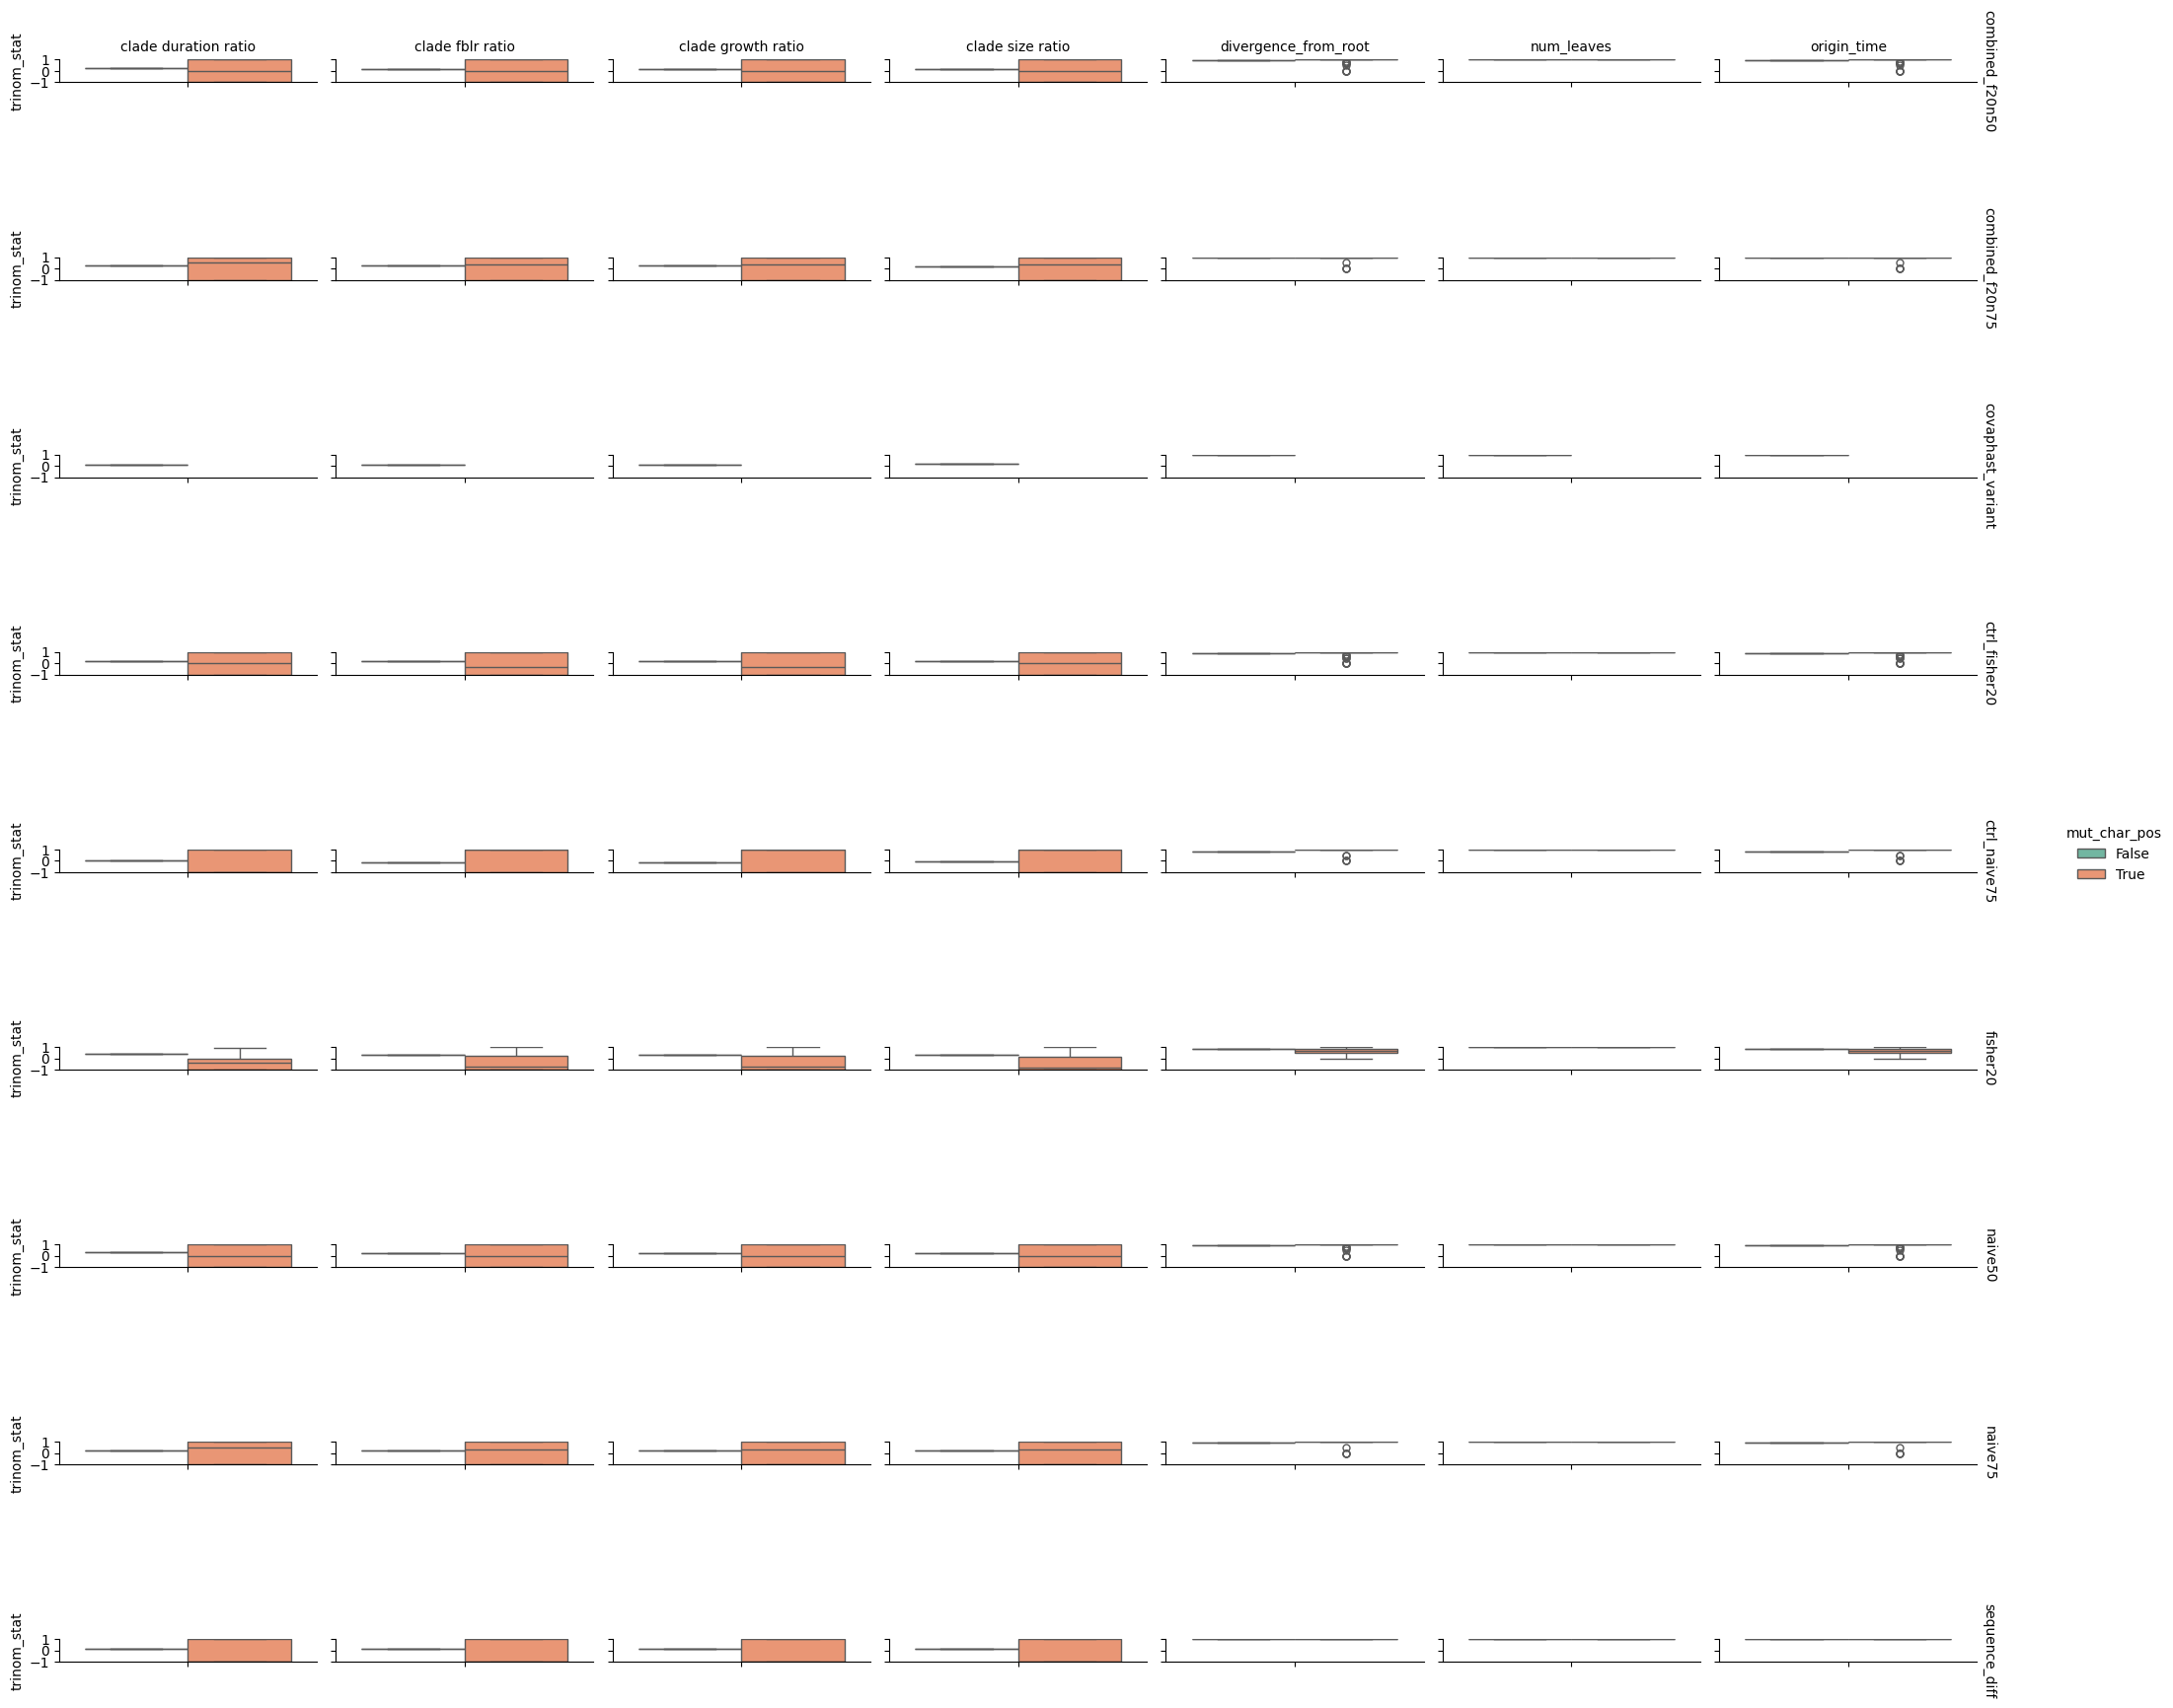

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


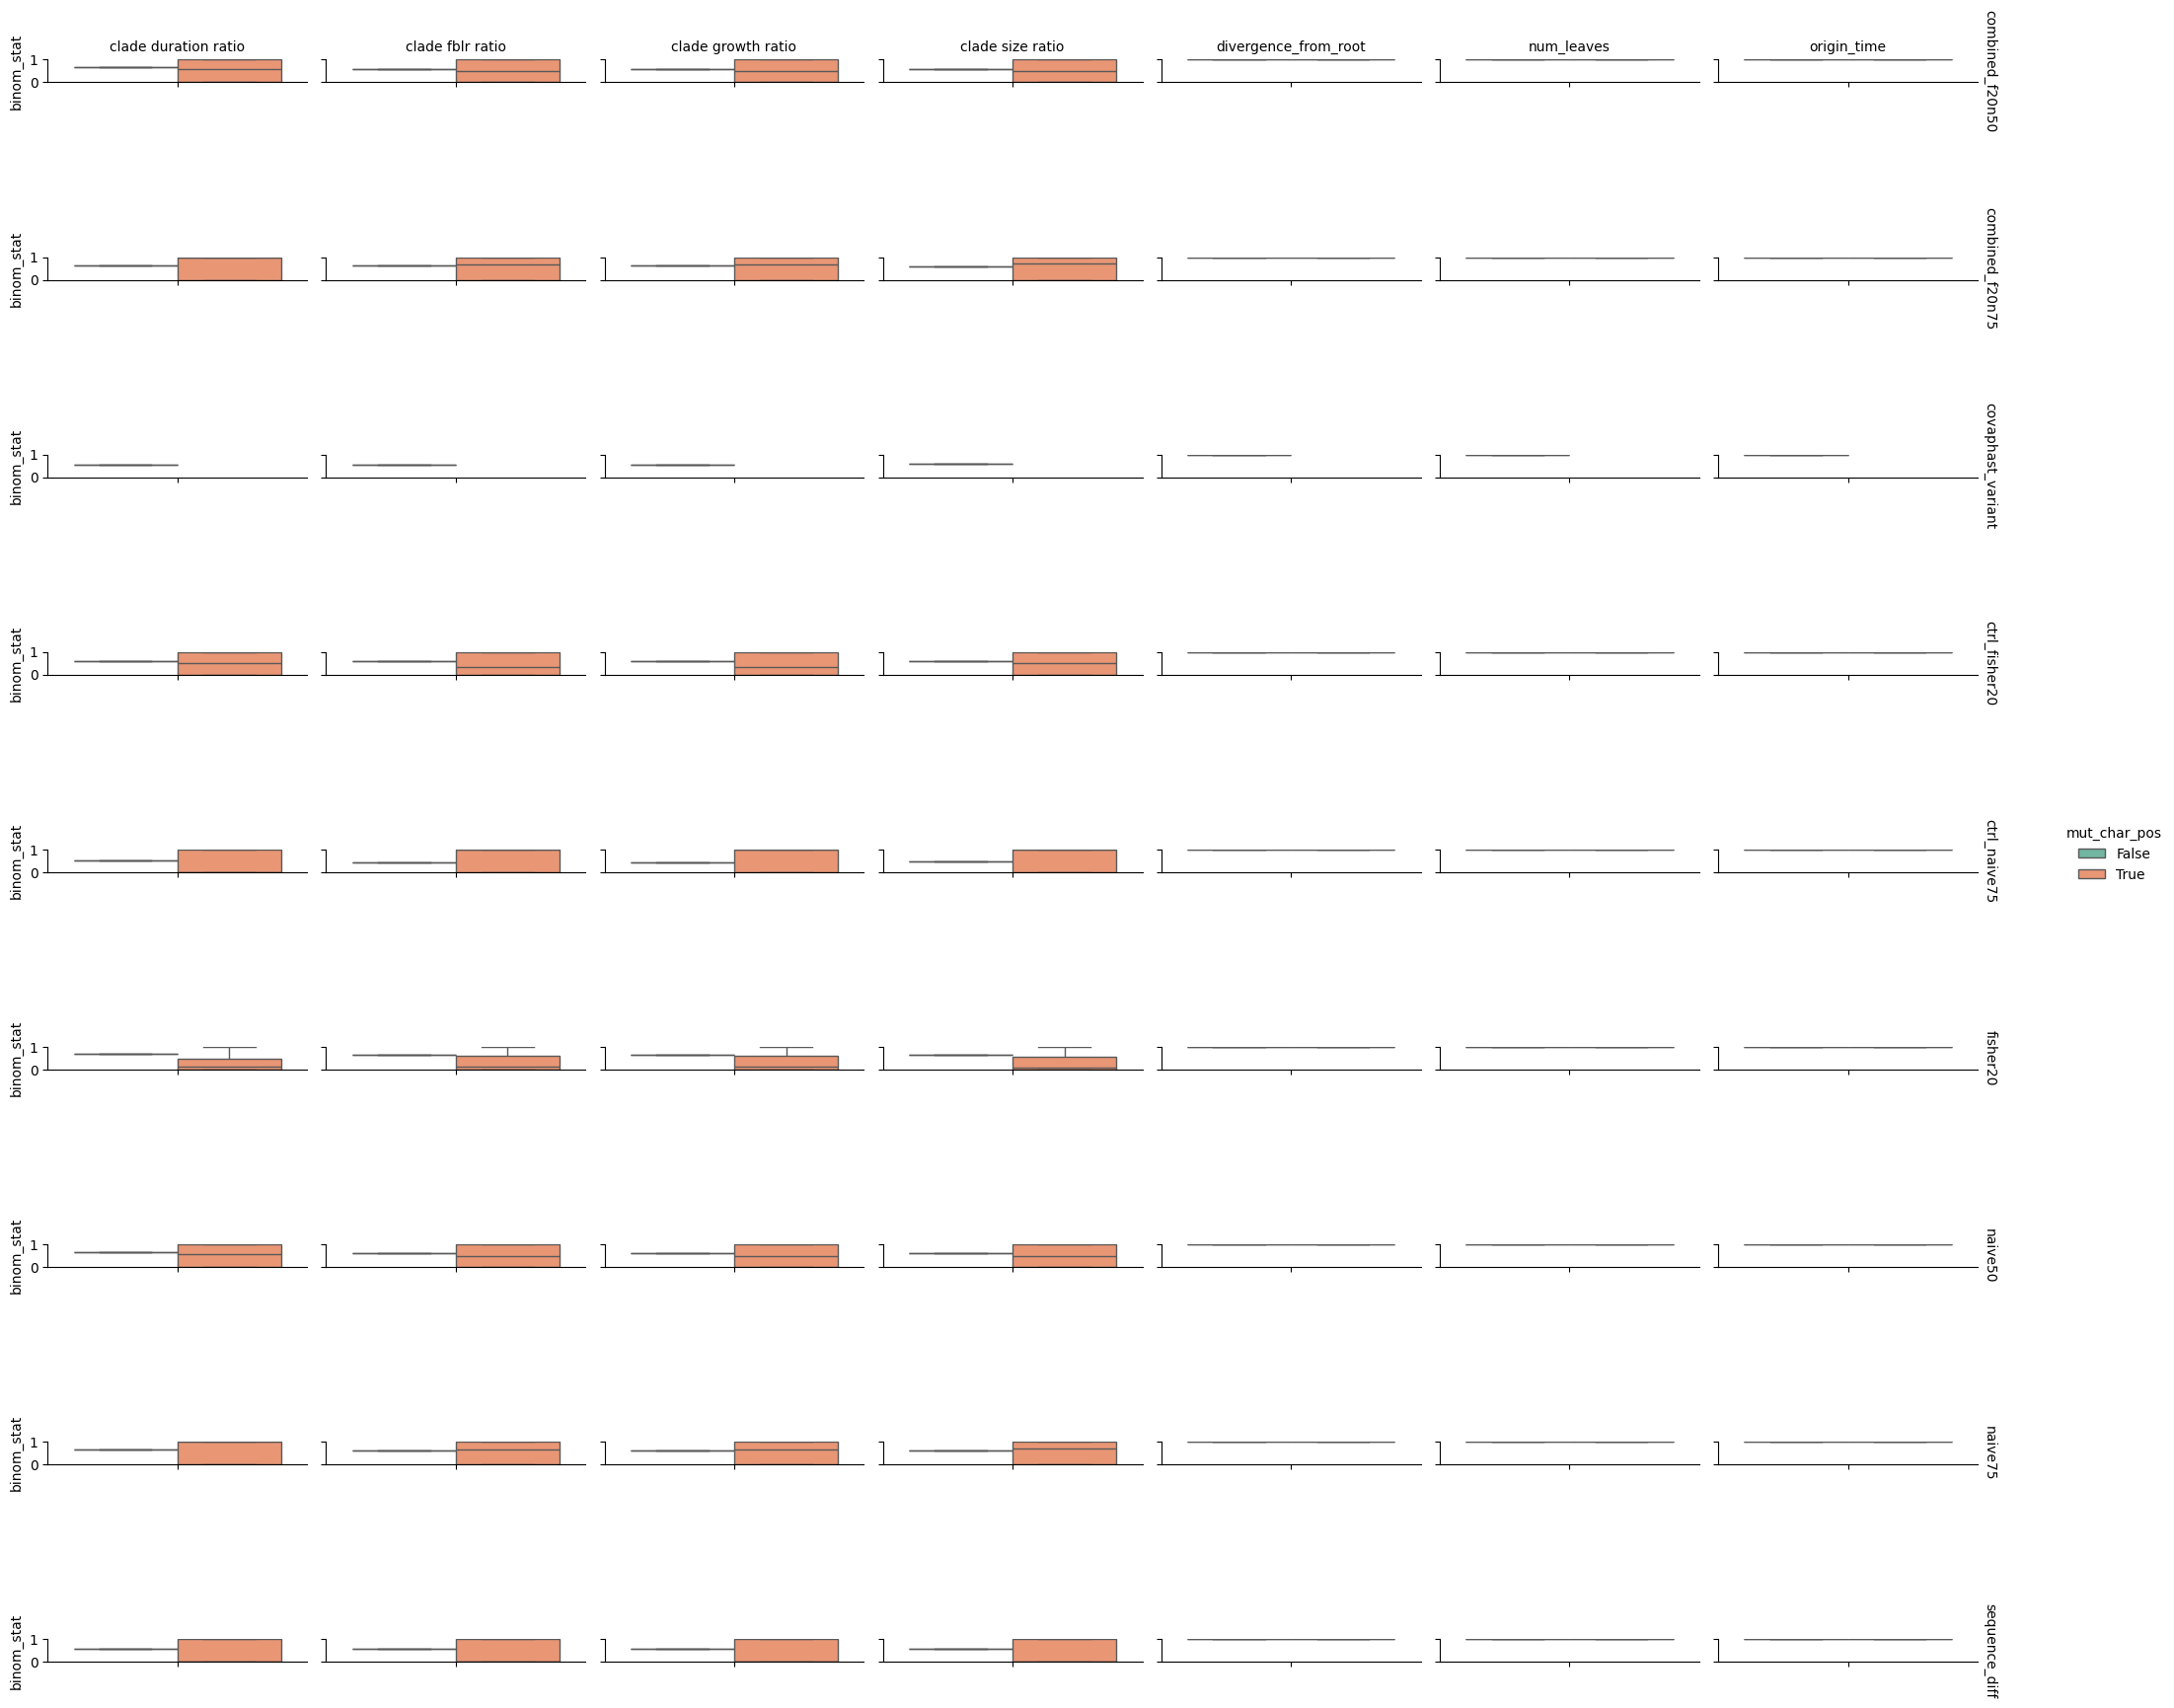

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


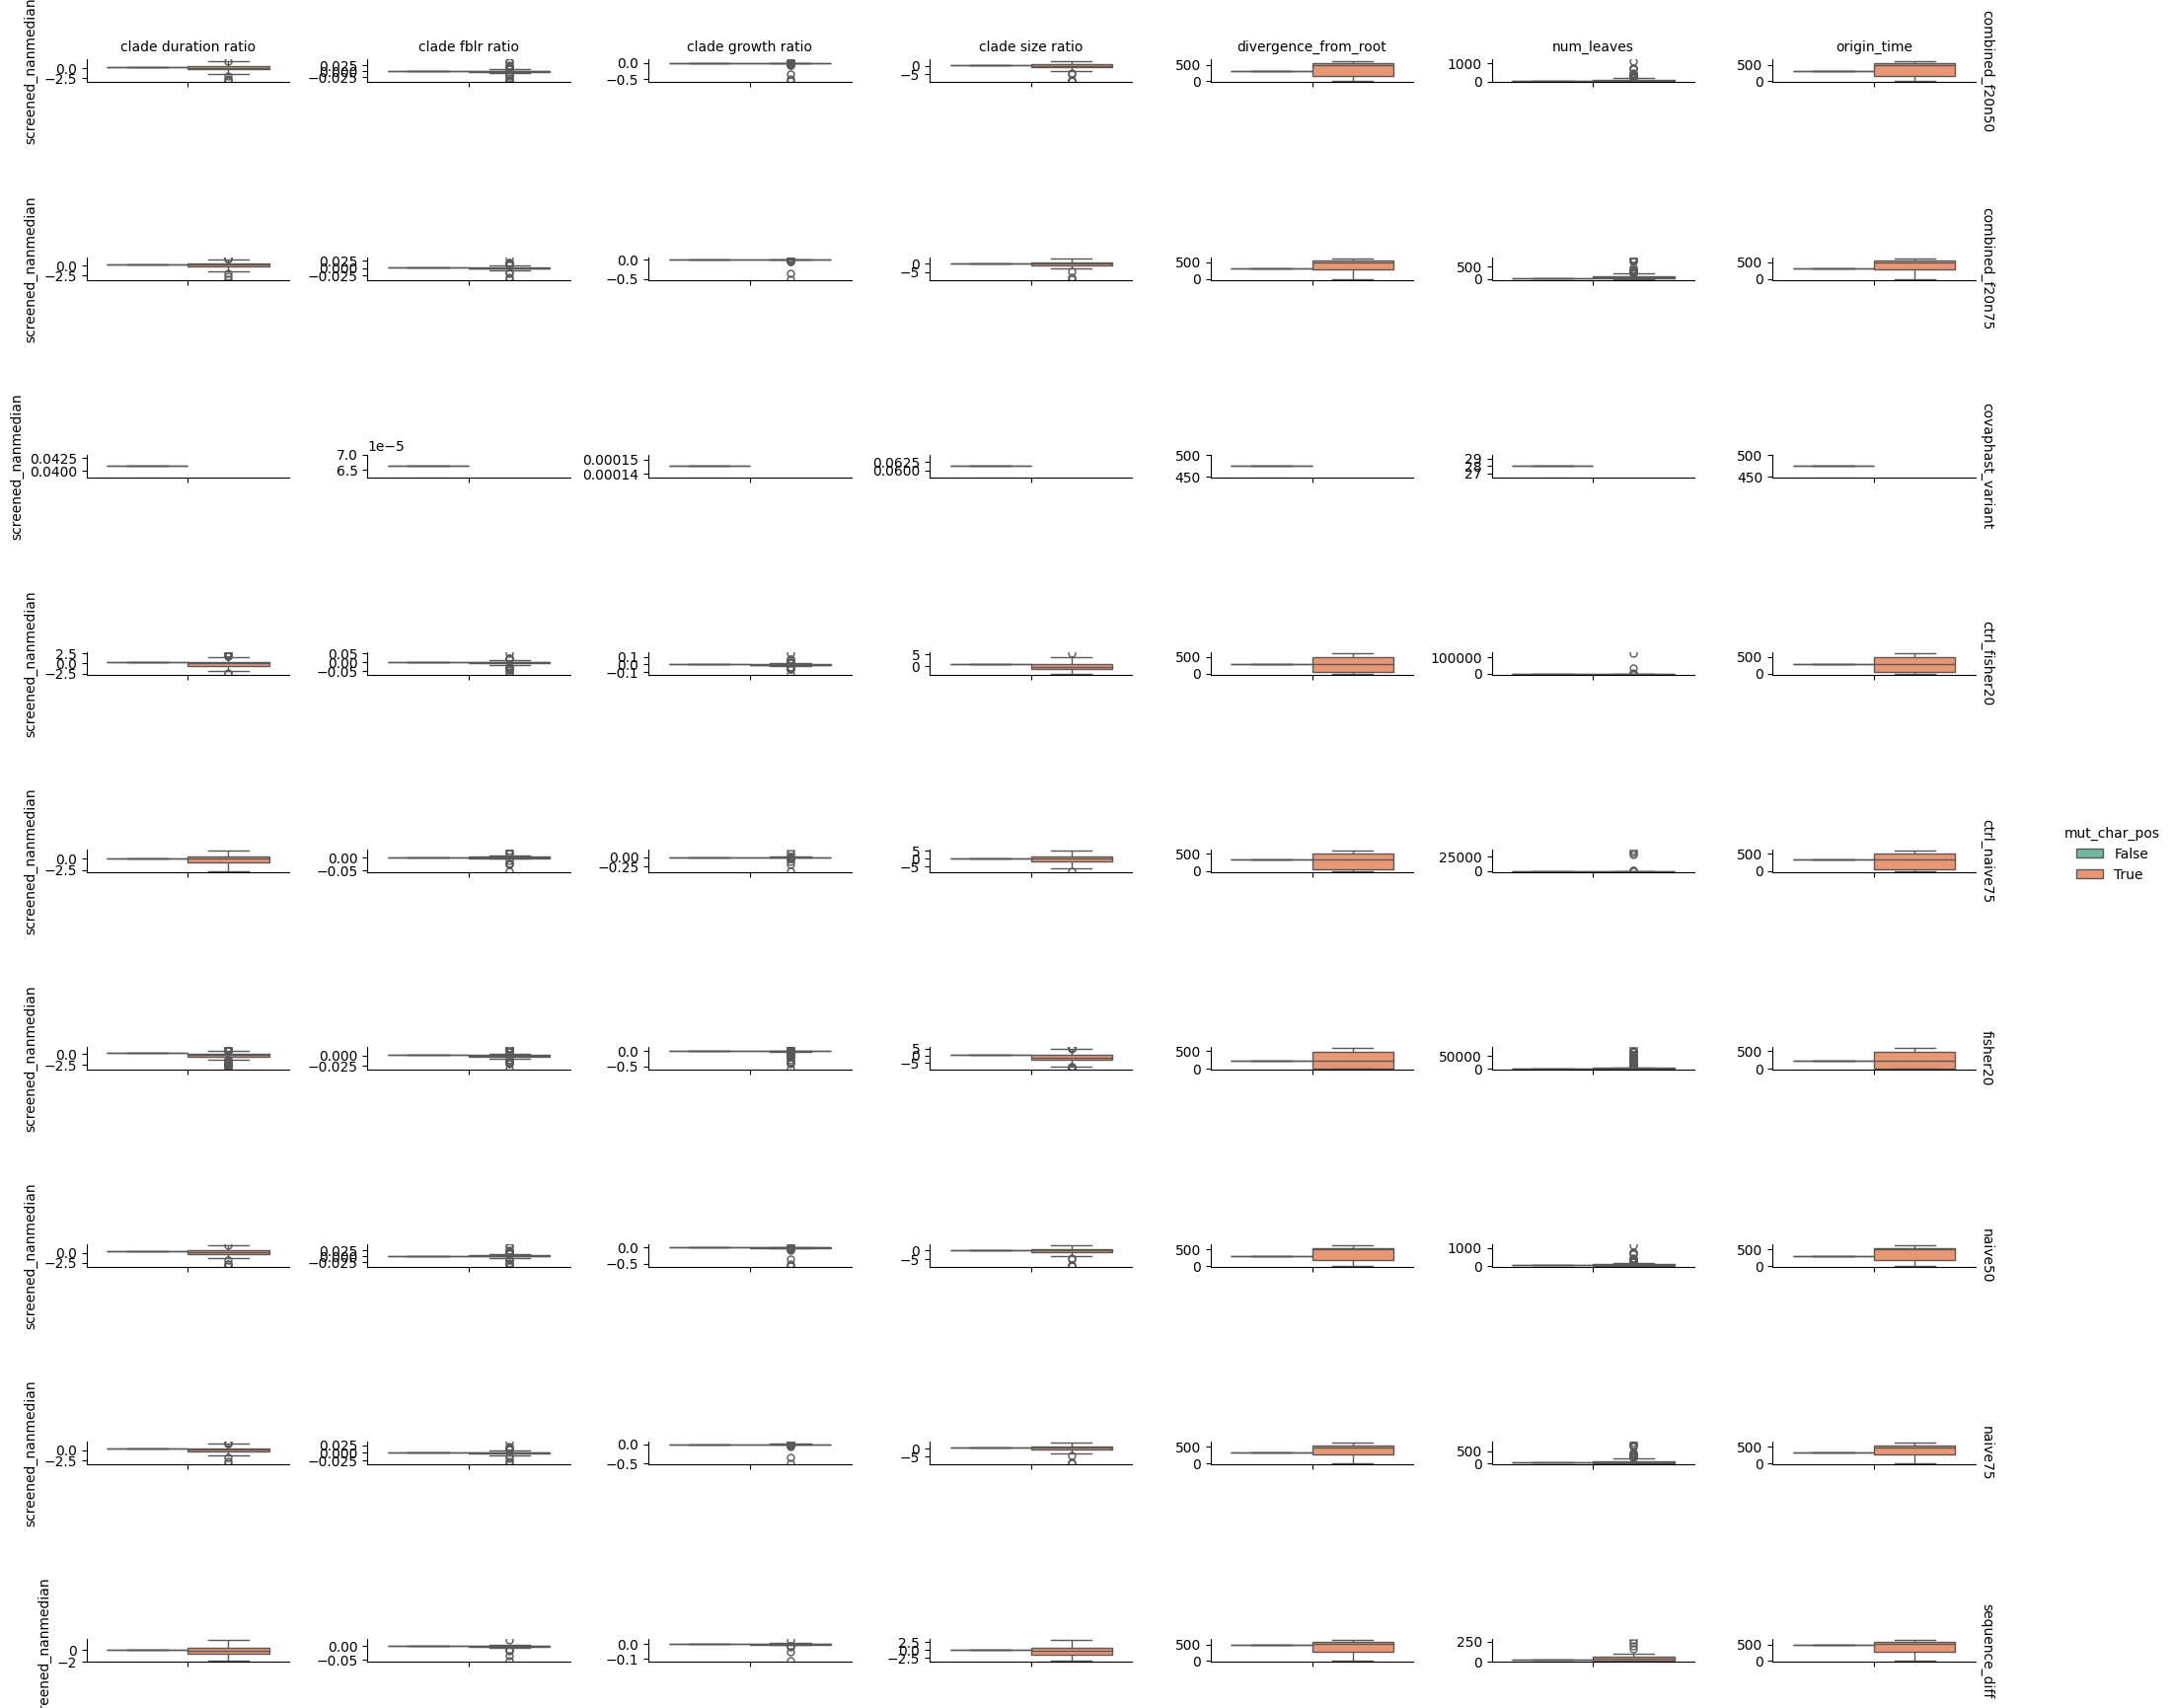

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


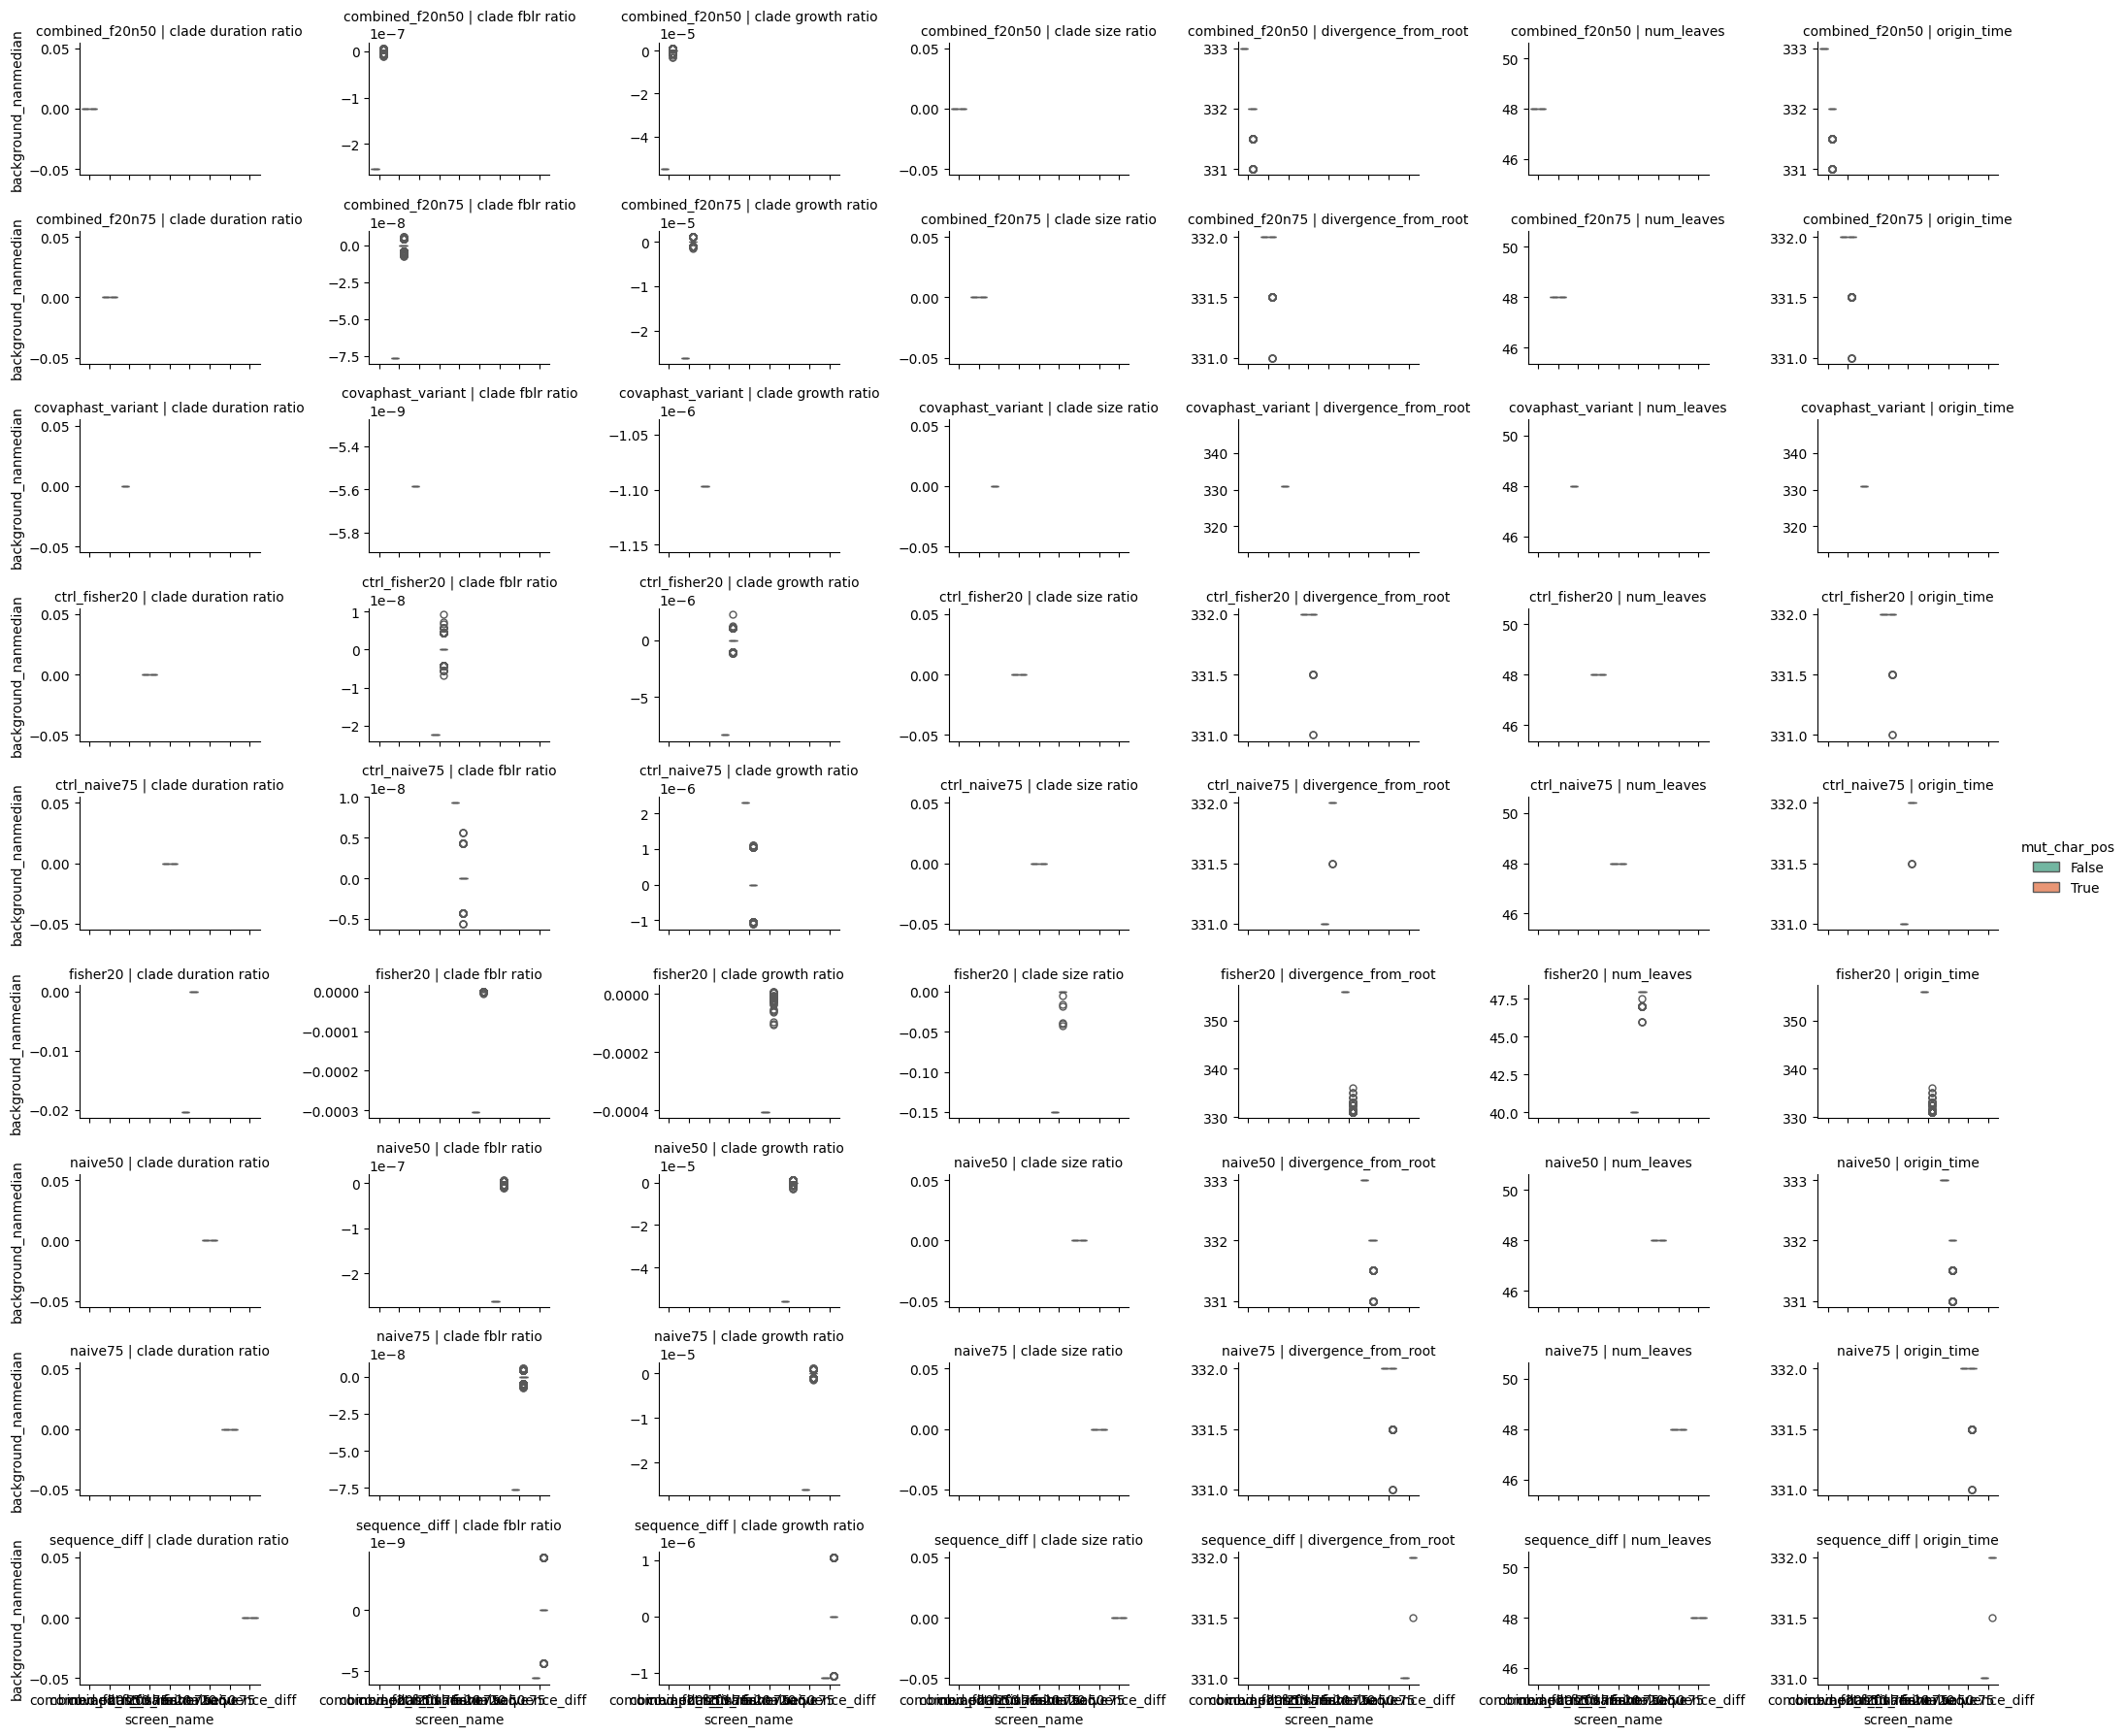

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
